# **SingleNueron Training**

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

tf.__version__

'2.5.0'

In [ ]:
x_data = np.array([1.0])
y_data = np.array([4.0])

model = Sequential()
model.add(Flatten(input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_data, y_data, epochs=1000)
result = model.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))
print(result)

# 더하기와 곱하기중 갈피를 못잡는 모습을 볼 수 있음.

Epoch 1/1000
1/1 [==============================] - 0s 249ms/step - loss: 12.5134
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 11.5323
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 10.6282
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.7949
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 9.0270
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 8.3193
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 7.6671
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 7.0660
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.5120
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.0015
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.5309
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.0973
Epoch 13/1000
1/1 [=========================

# **MNIST Dense example**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(type(train_images))
print(dir(train_images))

<class 'numpy.ndarray'>
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__r

In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


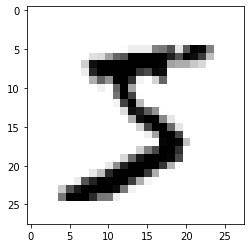

5


In [ ]:
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[0])

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, validation_split=0.1, epochs=5, batch_size=128)

Epoch 1/5
422/422 [==============================] - 5s 11ms/step - loss: 0.2723 - accuracy: 0.9208 - val_loss: 0.1257 - val_accuracy: 0.9653
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1104 - accuracy: 0.9669 - val_loss: 0.0842 - val_accuracy: 0.9760
Epoch 3/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.0814 - val_accuracy: 0.9757
Epoch 4/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 5/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 0.0705 - val_accuracy: 0.9798


In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9795


In [ ]:
print('test_acc : ',test_acc)

test_acc :  0.9794999957084656


In [ ]:
prediction = model.predict(test_images)

In [ ]:
prediction[1]

array([1.2489646e-09, 2.3197766e-05, 9.9997604e-01, 2.8883991e-07,
       7.8953496e-18, 3.4897812e-07, 4.2172141e-09, 1.6012409e-14,
       6.3627738e-08, 7.8558037e-13], dtype=float32)

In [ ]:
np.max(prediction[1])

0.99997604

In [ ]:
np.argmax(prediction[1])

2

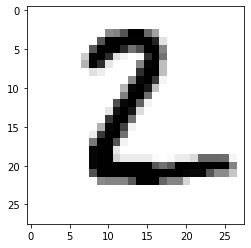

In [ ]:
import matplotlib.pyplot as plt

digit = np.reshape(test_images[1], (28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()